In [1]:
import os
import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as f

import numpy as np
import pandas as pd
import glob
import cv2
import matplotlib.pyplot as plt 
import torchvision.transforms as T
import tqdm
from torch.utils.data import DataLoader, sampler, random_split
from custom_dataset import CustomDataset
from loss_functions import ICE_loss
from models.ImgEnhanceNet import ImgEnhanceNet

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

In [10]:
os.chdir("./ExDark")

In [11]:
os.getcwd()

'/Users/yongyx/Documents/GRADUATE_CLASSES/ECE 228/Exclusively-Dark-Image-Project/ExDark'

In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


## DataLoader

We use the dataloader to load the train, validation and test sets.

In [13]:
NUM_TRAIN = 3000
NUM_VAL = 1800
NUM_TEST = 2563
BATCH_SIZE = 16

img_transform = T.Compose([ T.ToPILImage(),
                            T.RandomCrop((48,48)),
                            T.ToTensor()])
exDark = CustomDataset(os.getcwd(), transform=img_transform)
exDark_train, exDark_val, exDark_test = random_split(exDark, [NUM_TRAIN, NUM_VAL, NUM_TEST])

train_loader = DataLoader(exDark_train, batch_size=BATCH_SIZE, num_workers=0,
                         sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
val_loader = DataLoader(exDark_val, batch_size=BATCH_SIZE, num_workers=0,
                         sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))
test_loader = DataLoader(exDark_test, batch_size=BATCH_SIZE, num_workers=0,
                         sampler=sampler.SubsetRandomSampler(range(NUM_TEST)))                       

In [19]:
img_transform = T.Compose([ T.ToPILImage(),
                            T.ToTensor()])
exDark = CustomDataset(os.getcwd(), transform=img_transform)
exDark_train, exDark_val, exDark_test = random_split(exDark, [NUM_TRAIN, NUM_VAL, NUM_TEST])
test_loader = DataLoader(exDark_test, batch_size=BATCH_SIZE, num_workers=0,
                         sampler=sampler.SubsetRandomSampler(range(NUM_TEST))) 

In [20]:
len(test_loader)

161

## Training


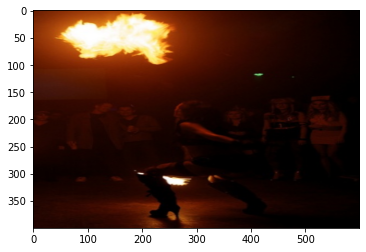

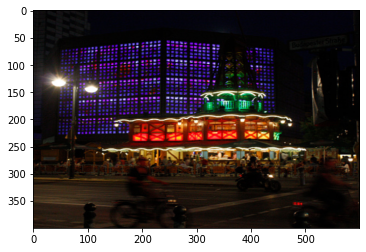

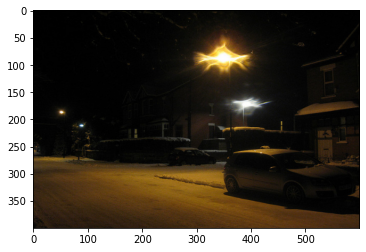

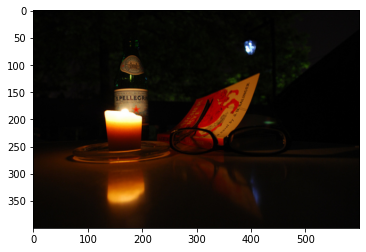

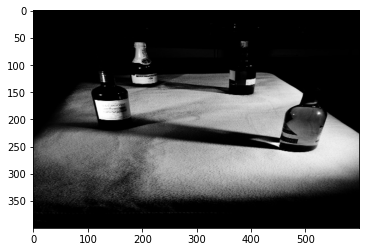

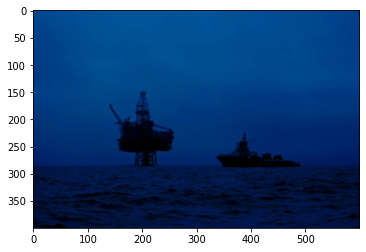

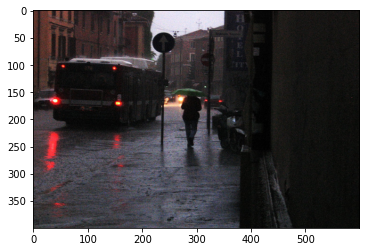

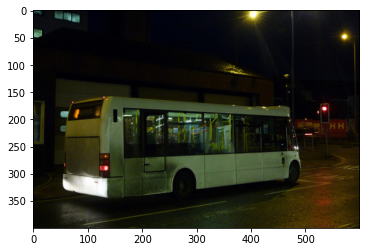

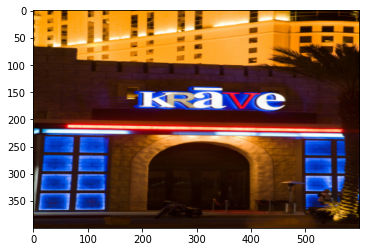

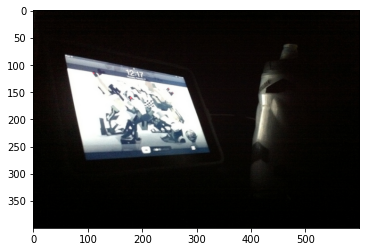

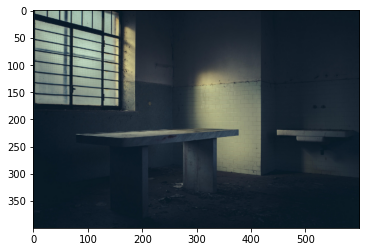

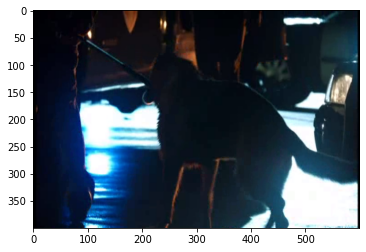

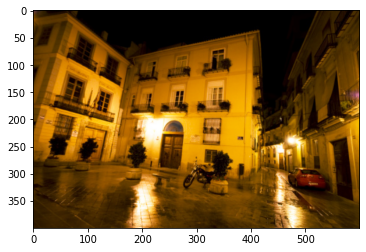

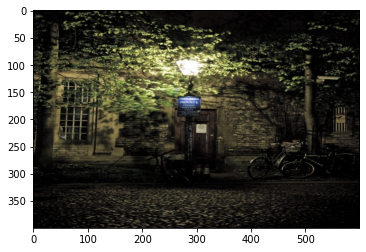

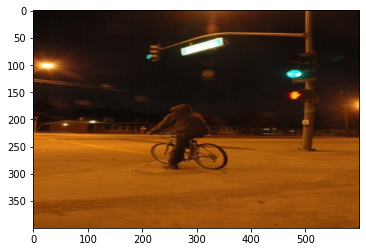

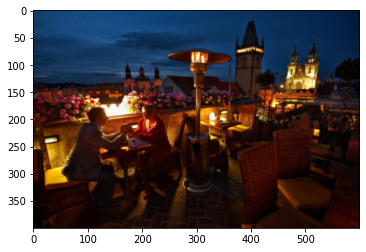

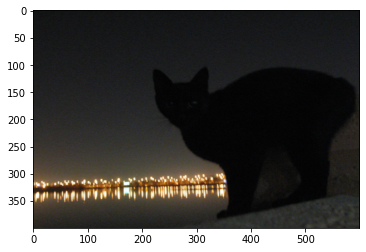

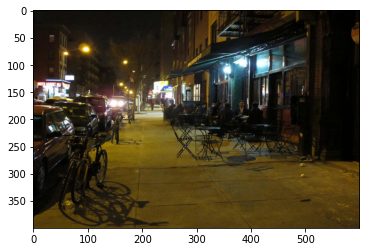

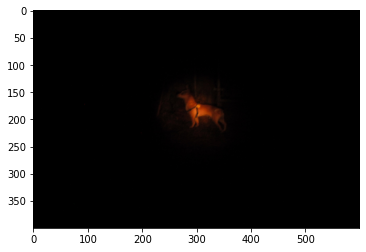

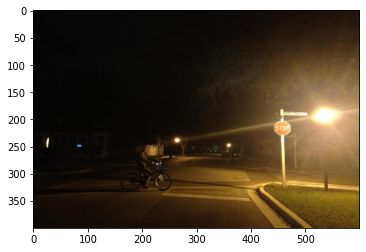

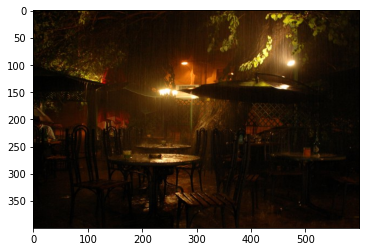

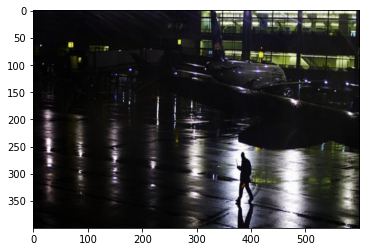

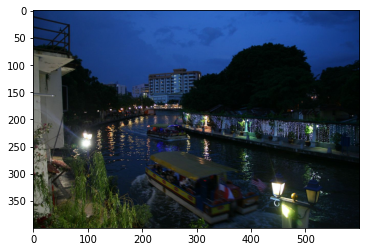

libpng warning: iCCP: known incorrect sRGB profile


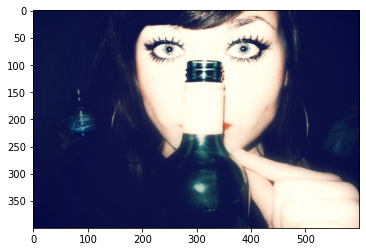

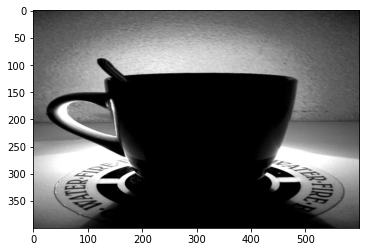

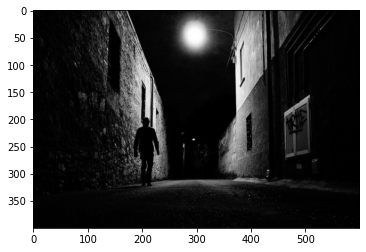

KeyboardInterrupt: 

In [29]:
for i, (img, class_) in enumerate(test_loader):
    # plt.imshow(img[0,:].permute(1,2,0).detach().numpy())
    plt.imshow(img[0,:].permute(1,2,0))
    plt.show()

In [11]:
# model = ImgEnhanceNet()
# model = model.to(device=device)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# for e in range(100):
#     print("Epoch {}:".format(e))
#     for i, (img, class_) in enumerate(train_loader):
#         model.train()
#         S = img.to(device=device, dtype=torch.float32)
       
#         optimizer.zero_grad()

#         #convert input image from [0,1] to [0,255]
#         R,I = model(S)
#         iceloss = ICE_loss(S,R,I)

#         iceloss.backward()

#         optimizer.step()
        
#         if i % 100 == 0:
#             print('Iteration %d, loss = %.4f' % (i, iceloss.item()))

# print("done")

In [12]:
# for e in range(50):
#     print("Epoch {}:".format(e))
#     for i, (img, class_) in enumerate(test_loader):
#         model.eval()

#         with torch.no_grad():
#             S = img.to(device=device, dtype=torch.float32)
        
#             optimizer.zero_grad()

#             #convert input image from [0,1] to [0,255]
#             R,I = model(S)
#             iceloss = ICE_loss(S,R,I)

#             optimizer.step()
            
#             if i % 100 == 0:
#                 print('Iteration %d, loss = %.4f' % (i, iceloss.item()))

# print("done")

In [5]:
os.getcwd()

'/Users/yongyx/Documents/GRADUATE_CLASSES/ECE 228/Exclusively-Dark-Image-Project'

In [3]:
!python "train.py"

Starting training: 
Epoch 0
Iteration 0, loss = 0.2242
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
libpng warning: iCCP: known incorrect sRGB profile
Validation loss = 0.2124
libpng warning: iCCP: known incorrect sRGB profile
Iteration 100, loss = 0.0386
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Validation loss = 0.0453
libpng warning: iCCP: known incorrect sRGB profile
Epoch 1
Iteration 0, loss = 0.0482
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng wa

In [ ]:
from PIL import Image


In [31]:
os.chdir('../')
os.getcwd()

'/Users/yongyx/Documents/GRADUATE_CLASSES/ECE 228/Exclusively-Dark-Image-Project'

In [6]:
model = torch.load(os.getcwd() + '/trained_models/ICENet_model.pth')

In [32]:
os.mkdir(os.getcwd() + '/enhanced_images')


In [33]:
os.chdir(os.getcwd() + '/enhanced_images')

In [34]:
os.getcwd()

'/Users/yongyx/Documents/GRADUATE_CLASSES/ECE 228/Exclusively-Dark-Image-Project/enhanced_images'

In [35]:
toPIL = T.ToPILImage()
model.eval()
with torch.no_grad():
    total_loss = 0
    for i, (img, classname) in enumerate(test_loader):
        S = img.to(device=device, dtype=torch.float32)

        R, I = model(S)

        for b in range(BATCH_SIZE):
            brightened_image = toPIL(R[b,:])
            brightened_image.save('image_{}.png'.format(i*b))
            

    total_loss += ICE_loss(S,R,I).item()
    total_loss /= len(val_loader)
    print("Test loss = %.4f" % (total_loss))

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB


KeyboardInterrupt: 

In [36]:
os.chdir('../')

In [37]:
os.getcwd()

'/Users/yongyx/Documents/GRADUATE_CLASSES/ECE 228/Exclusively-Dark-Image-Project'

In [39]:
from PIL import Image

(400, 600, 3)


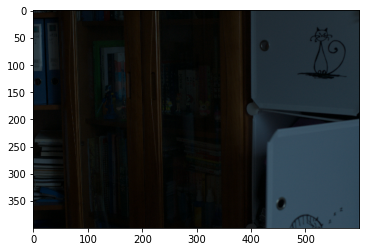

In [52]:
img1 = cv2.imread('test_image.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
print(img1.shape)
plt.imshow(img1)
img1 = T.ToPILImage()(img1)
img1 = T.ToTensor()(img1)


In [58]:
img = img1[None,:,:,:]
img = img.to(device, dtype=torch.float32)
img.size()

torch.Size([1, 3, 400, 600])

In [59]:
R, I = model(img)

In [61]:
brightened_image = toPIL(R[0,:])
brightened_image.show()